In [1]:
import numpy as np
from sklearn.metrics import roc_curve, auc

# Funcs

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

def calculate_lift(dataframe):
    # Sort the dataframe by predicted probability in descending order
    dataframe = dataframe.sort_values(by='PRED', ascending=False).reset_index(drop=True)

    # Calculate the number of observations and events
    total_observations = len(dataframe)
    total_events = dataframe['TARGET'].sum()

    # Calculate the random response rate
    random_response_rate = total_events / total_observations

    # Initialize lists to store cumulative event rate and lift values
    cumulative_event_rate = []
    lift_values = []

    # Calculate cumulative event rate and lift for each bin
    for i in range(1, total_observations + 1):
        bin_data = dataframe.iloc[:i]
        bin_events = bin_data['TARGET'].sum()
        bin_event_rate = bin_events / i

        cumulative_event_rate.append(bin_event_rate)
        lift_values.append(bin_event_rate / random_response_rate)

    # Add cumulative event rate and lift values to the dataframe
    dataframe['Cumulative Event Rate'] = cumulative_event_rate
    dataframe['Lift'] = lift_values

    return dataframe

def plot_lift_chart(dataframes):
    plt.figure(figsize=(10, 6))
    names = ['logit_base', 'lgbm_base', 'logit', 'lgbm']
    # Plotting lift charts for all datasets
    for i, df in enumerate(dataframes):
        print(i, names[i])
        # bins = range(1, len(df) + 1)
        bins = np.linspace(0, 100, len(df))
        lift_values = df['Lift']

        plt.plot(bins, lift_values, label='Model {}'.format(names[i]))

    plt.xlabel('Percentage')
    plt.ylabel('Lift')
    plt.title('Lift Chart - Comparison')
    plt.grid(True)

    # Plotting random model (100%)
    plt.axhline(y=1, color='r', linestyle='--', label='Random Model (100%)')

    plt.legend()
    plt.show()


def plot_roc_chart(dataframe1, dataframe2, dataframe3, dataframe4):
    fpr1, tpr1, _ = roc_curve(dataframe1['TARGET'], dataframe1['PRED'])
    roc_auc1 = auc(fpr1, tpr1)
    fpr2, tpr2, _ = roc_curve(dataframe2['TARGET'], dataframe2['PRED'])
    roc_auc2 = auc(fpr2, tpr2)
    fpr3, tpr3, _ = roc_curve(dataframe3['TARGET'], dataframe3['PRED'])
    roc_auc3 = auc(fpr3, tpr3)
    fpr4, tpr4, _ = roc_curve(dataframe4['TARGET'], dataframe4['PRED'])
    roc_auc4 = auc(fpr4, tpr4)

    plt.figure()
    plt.plot(fpr1, tpr1, label='LOGIT BASE (AUC = %0.2f)' % roc_auc1)
    plt.plot(fpr2, tpr2, label='LGBM BASE (AUC = %0.2f)' % roc_auc2)
    plt.plot(fpr3, tpr3, label='LOGIT (AUC = %0.2f)' % roc_auc3)
    plt.plot(fpr4, tpr4, label='LGBM (AUC = %0.2f)' % roc_auc4)
    plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Model')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()

# Load data

In [3]:
PATH = '/content/drive/MyDrive/dseb-neu/Senior/HomeCredit/REPO/HomeCreditDefaultRisk/ModelEvaluation/DATA/'
logit_base = pd.read_excel(PATH + 'test_LOGIT_BASE.xlsx')
logit = pd.read_excel(PATH + 'test_LOGIT.xlsx')
lgbm_base = pd.read_excel(PATH + 'test_LGBM_BASE.xlsx')
lgbm = pd.read_excel(PATH + 'test_LGBM.xlsx')

# Plot

In [4]:
# # Example usage
lift_logit_base = calculate_lift(logit_base[['PRED', 'TARGET']])
lift_lgb_base = calculate_lift(lgbm_base[['PRED', 'TARGET']])
lift_logit = calculate_lift(logit[['PRED', 'TARGET']])
lift_lgbm = calculate_lift(lgbm[['PRED', 'TARGET']])


0 logit_base
1 lgbm_base
2 logit
3 lgbm


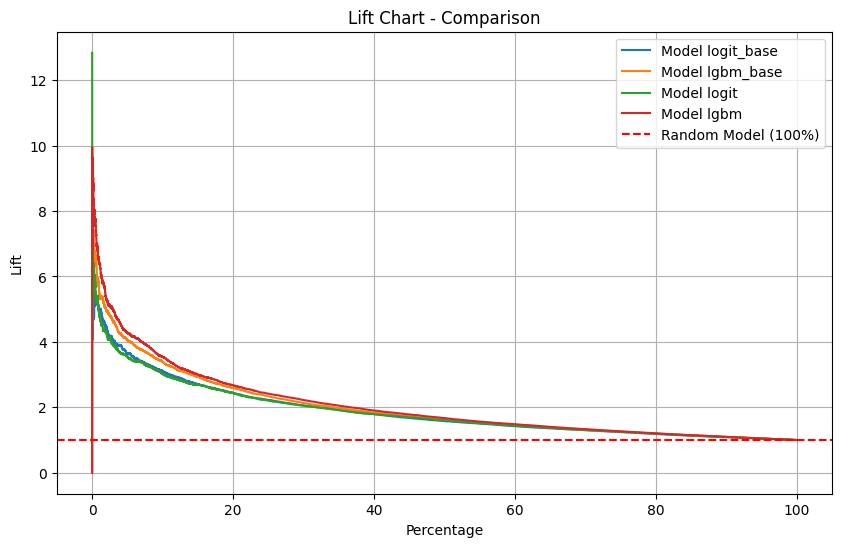

In [7]:
plot_lift_chart([lift_logit_base, lift_lgb_base, lift_logit, lift_lgbm])

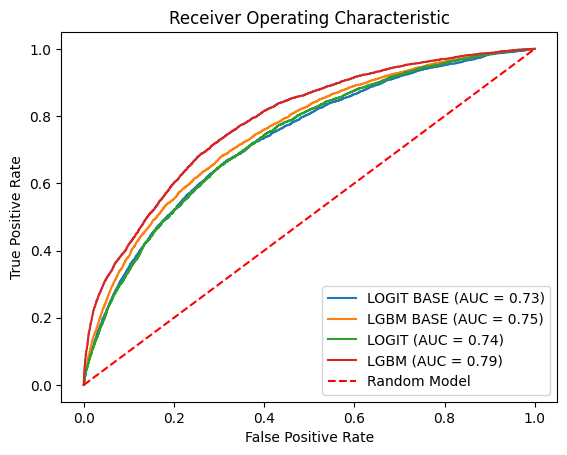

In [ ]:
plot_roc_chart(lift_logit_base, lift_lgb_base, lift_logit, lift_lgbm)